### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import pickle

### Importing CSV file

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Shape of dataset

In [3]:
df.shape

(400, 5)

### Checking null counts

In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Dropping duplicate values if any

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(400, 5)

So, There is no duplicate values that's why shape is still (400,5)

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

Dropping User ID column because we do not this.

In [9]:
df.drop(['User ID'],axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Checking if our dataset is imbalance or not

In [11]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

Our dataset is balanced.

### Gender distribution

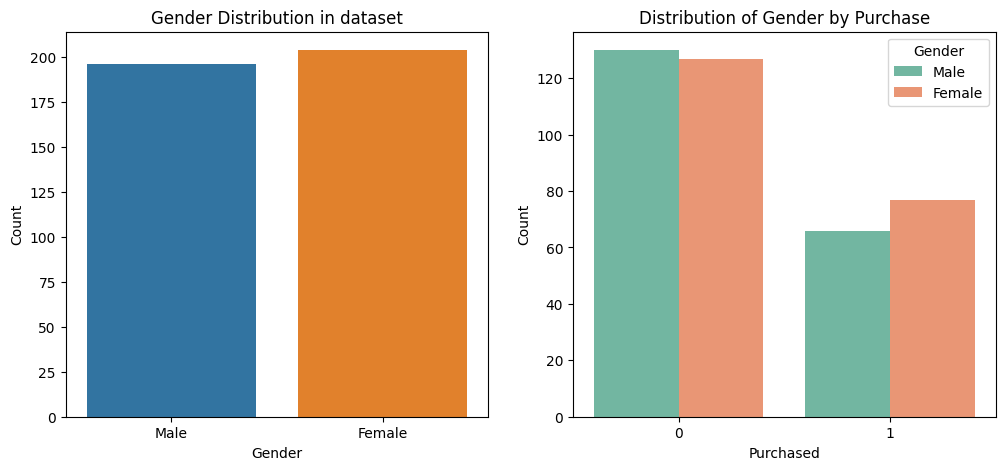

In [13]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
# Countplot 1
sns.countplot(x='Gender', data=df, ax=axes[0])
axes[0].set_title('Gender Distribution in dataset')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Countplot 2
sns.countplot(data=df, x='Purchased', hue='Gender',ax=axes[1], palette='Set2')
axes[1].set_xlabel('Purchased')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Gender by Purchase')
plt.show()

In second visualization, we can see females purchased more than males.

### Age distribution

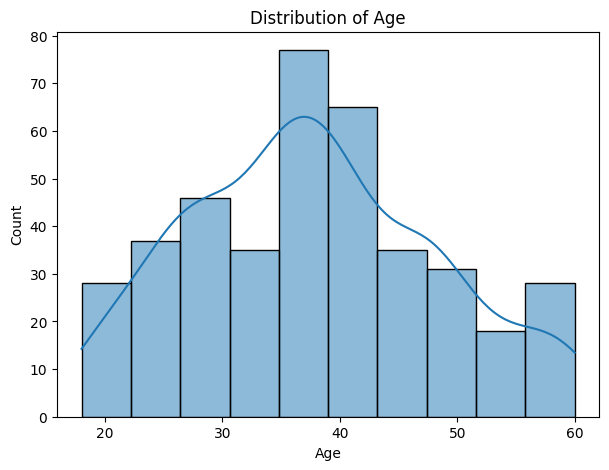

In [14]:
fig, ax = plt.subplots(figsize=(7,5))
# Histogram
sns.histplot(data=df, x="Age", bins=10, kde=True, ax=ax)
ax.set_title("Distribution of Age")
plt.show()

From this we can say Age is following Gaussian distribution.

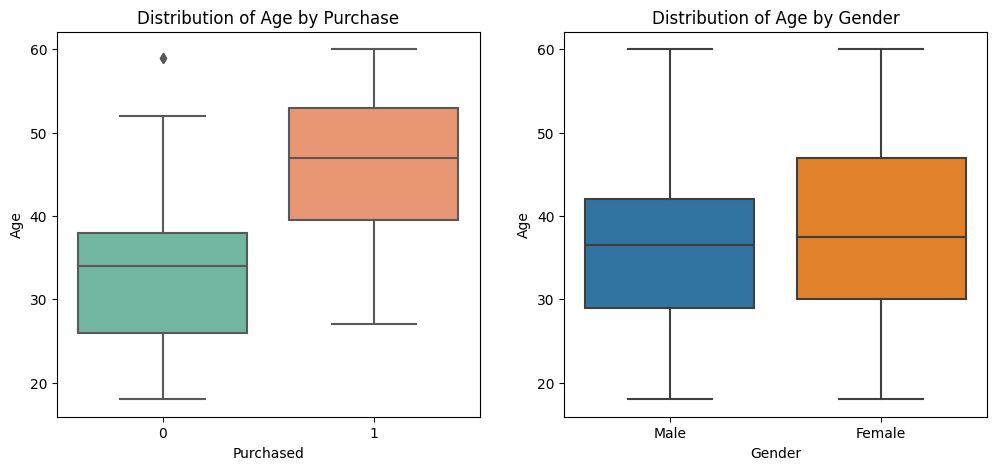

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
# Boxplot 1
sns.boxplot(x='Purchased', y='Age', data=df, palette='Set2',ax=axes[0])
axes[0].set_xlabel('Purchased')
axes[0].set_ylabel('Age')
axes[0].set_title('Distribution of Age by Purchase')

# Boxplot 2
sns.boxplot(x='Gender', y='Age', data=df,ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
axes[1].set_title('Distribution of Age by Gender')

plt.show()

Clearly we can see elder people are purchasing more from ad.

### Estimated salary distribution

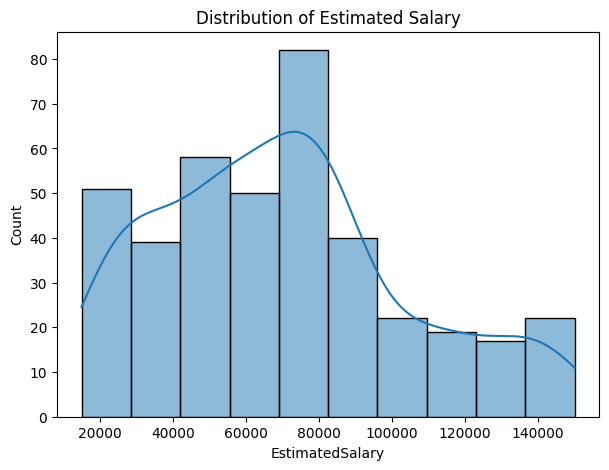

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
# Histogram
sns.histplot(data=df, x="EstimatedSalary", bins=10, kde=True, ax=ax)
ax.set_title("Distribution of Estimated Salary")
plt.show()

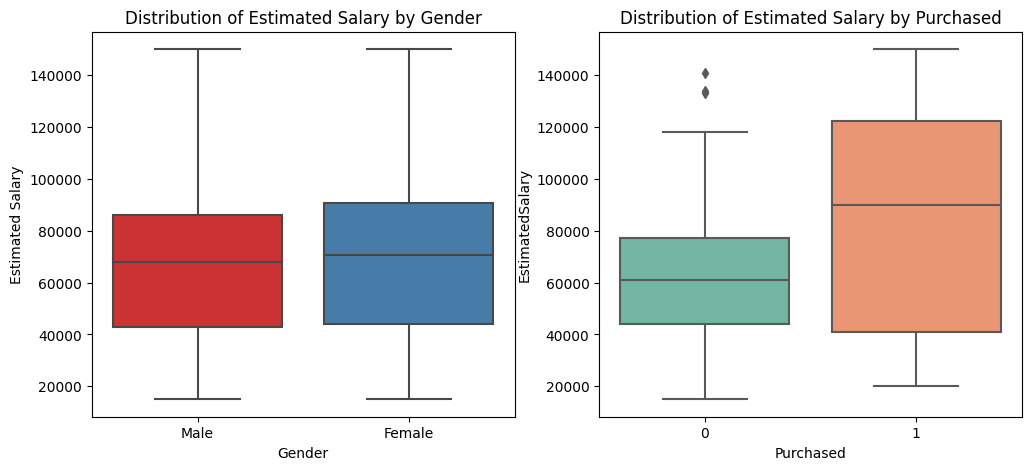

In [17]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
# Boxplot 1
sns.boxplot(x='Gender', y='EstimatedSalary', data=df, palette='Set1', ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Estimated Salary')
axes[0].set_title('Distribution of Estimated Salary by Gender')

# Boxplot 2
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, palette='Set2', ax=axes[1])
axes[1].set_xlabel('Purchased')
axes[1].set_ylabel('EstimatedSalary')
axes[1].set_title('Distribution of Estimated Salary by Purchased')
plt.show()

We can see there is large deviation in Salary of person who purchased

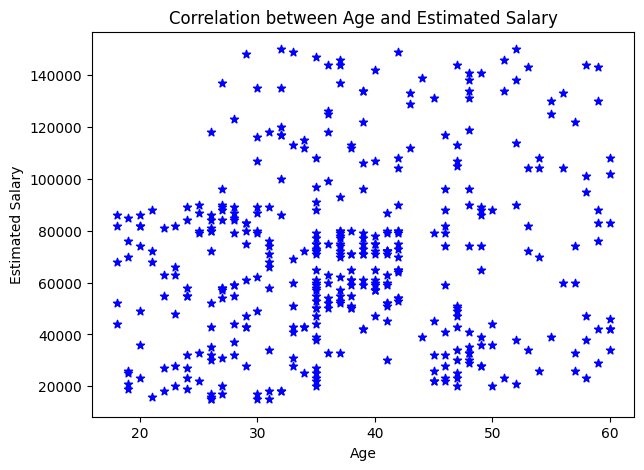

In [18]:
plt.figure(figsize=(7,5))
# Scatter plot
plt.scatter(df['Age'], df['EstimatedSalary'], c='blue', marker='*')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Correlation between Age and Estimated Salary')
plt.show()

There is no correlation between Age and Estimated Salary

### Doing one-hot encoding of "Gender" column

In [19]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
male = pd.DataFrame(ohe.fit_transform(df[['Gender']]), columns=['Male'])
male.head()

,Male
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


### Adding "Gender_Male" column in dataframe and removing "Gender" column

In [20]:
df['Gender_Male'] = male
df.drop('Gender',axis=1,inplace=True)
df.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1.0
1,35,20000,0,1.0
2,26,43000,0,0.0
3,27,57000,0,0.0
4,19,76000,0,1.0


### Correlation between variables 

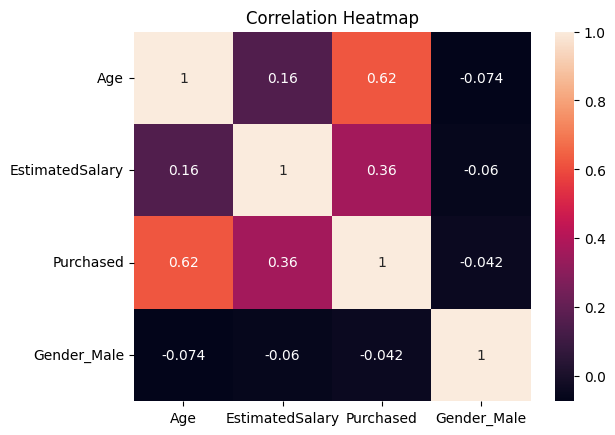

In [21]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

We can see "Gender_Male" column is negligible correlated with dependent variable i.e. "Purchased" column. So first we train our model by selecting all three independent variables. And then try by dropping "Gender_Male" column.

### Independent variable

In [22]:
X = df.drop('Purchased',axis=1)
X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1.0
1,35,20000,1.0
2,26,43000,0.0
3,27,57000,0.0
4,19,76000,1.0


In [23]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Splitting into training and testing set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2, stratify=y)

### Performing standardization to training set

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[0:5]

array([[-1.33732861, -1.27939578, -0.98142253],
       [-1.53372382, -0.20827373, -0.98142253],
       [-1.82831663, -1.45791612, -0.98142253],
       [ 2.09958751,  2.17199748,  1.01892912],
       [-0.64994539,  0.56531441, -0.98142253]])

### Training our model

In [26]:
cls = SVC()
cls.fit(X_train_scaled,y_train)

SVC()

### Standardizing the testing set and then predicting using model

In [27]:
X_test_scaled = scaler.transform(X_test)
y_pred = cls.predict(X_test_scaled)

### Confusion matrix

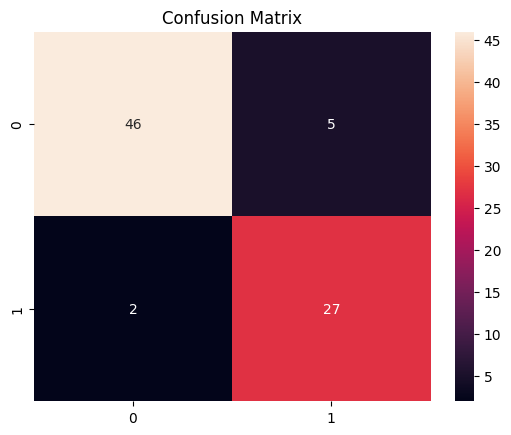

In [28]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

### Classification report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



### Independent variable without "Gender_Male" column

In [30]:
X = df.drop(['Gender_Male','Purchased'],axis=1)
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


### Splitting into training and testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2, stratify=y)

### Performing standardization to training set and testing set

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[0:5]

array([[-1.33732861, -1.27939578],
       [-1.53372382, -0.20827373],
       [-1.82831663, -1.45791612],
       [ 2.09958751,  2.17199748],
       [-0.64994539,  0.56531441]])

### Training our model

In [33]:
cls1 = SVC()
cls1.fit(X_train_scaled,y_train)

SVC()

### Predicting for testing set

In [34]:
y_pred = cls1.predict(X_test_scaled)

### Confusion matrix

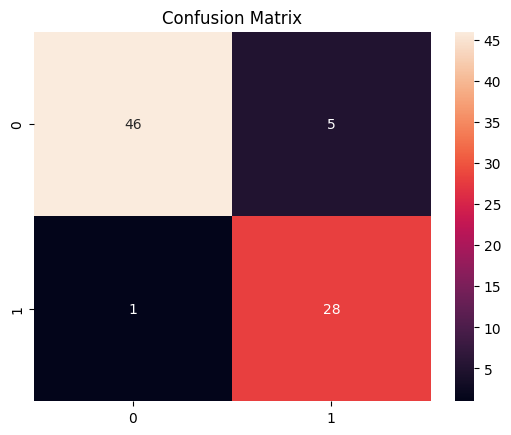

In [35]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

### Classification report

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.85      0.97      0.90        29

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



Clearly we can see model "cls1" performed better than model "cls"

### Saving our model

In [37]:
with open('model.pkl','wb') as f:
    pickle.dump(cls1,f)